In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

from fakegym.fakegym import FakeGym
import importlib

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        self.distance = None
        self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        self.distance = self.env.state_object.distance
        self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (9, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
        arr = np.hstack((arr, np.array(self.distance)))
        arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(FakeGym):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obstacles_each=2,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        - negative reward for normal move so that james moves faster to goal
        - still lower negative reward if james gets closer to goal
        - high positive award for reaching it
        - high negative award to hitting a wall
        - epsilon only to divide never by 0

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            epsilon = 10**-5
            cost_step = 1
            distance = self.get_target_distance()+epsilon
            cost_distance = (distance**0.4)/(distance)
            reward_factor = -1
            reward = reward_factor * (cost_step * cost_distance)
            if self.state_object:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 1000:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv()
check_env(env)

/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
time_steps = 10**4
reward_function = "nReward2"
fake = "WebotFakeMini"
name = "TRPO_pj1"
model_name = "PPO_{}_{}_{}_{}".format(fake, name, reward_function, time_steps)

model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("../models/fake/{}".format(model_name))
del model





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00349 |      -0.01386 |      9.36e+04 |       0.00071 |       1.38560
     -0.01703 |      -0.01381 |      9.35e+04 |       0.00514 |       1.38127
     -0.02150 |      -0.01372 |      9.34e+04 |       0.01433 |       1.37230
     -0.01951 |      -0.01366 |      9.33e+04 |       0.02062 |       1.36619
Evaluating losses...
     -0.02386 |      -0.01368 |      9.33e+04 |       0.01876 |       1.36796
----------------------------------
| EpLenMean       | 62.3         |
| EpRewMean       | 358          |
| EpThisIter      | 3            |
| EpisodesSoFar   | 3            |
| TimeElapsed     | 1.2          |
| Timesteps

     -0.00969 |      -0.01366 |      2.73e+04 |       0.00142 |       1.36586
     -0.01152 |      -0.01370 |      2.69e+04 |       0.00547 |       1.36963
     -0.01207 |      -0.01365 |      2.66e+04 |       0.00818 |       1.36535
Evaluating losses...
     -0.01746 |      -0.01358 |      2.65e+04 |       0.00911 |       1.35811
----------------------------------
| EpLenMean       | 144          |
| EpRewMean       | -487         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 6            |
| TimeElapsed     | 4.15         |
| TimestepsSoFar  | 1280         |
| ev_tdlam_before | 0.00818      |
| loss_ent        | 1.358109     |
| loss_kl         | 0.009113725  |
| loss_pol_entpen | -0.01358109  |
| loss_pol_surr   | -0.017455999 |
| loss_vf_loss    | 26458.727    |
----------------------------------
********** Iteration 5 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00066 |      -0.01352 |      5.11e+04 |  

     -0.00570 |      -0.01365 |      2.66e+04 |       0.00129 |       1.36549
     -0.01207 |      -0.01361 |      2.65e+04 |       0.00358 |       1.36052
     -0.01481 |      -0.01356 |      2.65e+04 |       0.00620 |       1.35616
Evaluating losses...
     -0.01498 |      -0.01355 |      2.64e+04 |       0.00702 |       1.35537
----------------------------------
| EpLenMean       | 292          |
| EpRewMean       | -2.14e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 9            |
| TimeElapsed     | 10.3         |
| TimestepsSoFar  | 3328         |
| ev_tdlam_before | -0.000124    |
| loss_ent        | 1.3553723    |
| loss_kl         | 0.007016729  |
| loss_pol_entpen | -0.013553724 |
| loss_pol_surr   | -0.014975965 |
| loss_vf_loss    | 26426.363    |
----------------------------------
********** Iteration 13 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00013 |      -0.01353 |      2.64e+04 | 

     -0.00170 |      -0.01364 |      2.66e+04 |       0.00027 |       1.36393
     -0.00848 |      -0.01362 |      2.66e+04 |       0.00286 |       1.36190
     -0.00900 |      -0.01360 |      2.65e+04 |       0.00625 |       1.36047
     -0.00929 |      -0.01361 |      2.65e+04 |       0.00678 |       1.36060
Evaluating losses...
     -0.01145 |      -0.01362 |      2.64e+04 |       0.00530 |       1.36175
----------------------------------
| EpLenMean       | 361          |
| EpRewMean       | -2.97e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 13           |
| TimeElapsed     | 16.2         |
| TimestepsSoFar  | 5376         |
| ev_tdlam_before | 0.000135     |
| loss_ent        | 1.3617473    |
| loss_kl         | 0.0052985386 |
| loss_pol_entpen | -0.013617473 |
| loss_pol_surr   | -0.011446636 |
| loss_vf_loss    | 26430.06     |
----------------------------------
********** Iteration 21 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss | 

    -8.39e-05 |      -0.01332 |      2.62e+04 |      2.47e-05 |       1.33155
     -0.00234 |      -0.01334 |      2.62e+04 |       0.00030 |       1.33425
     -0.00305 |      -0.01336 |      2.61e+04 |       0.00060 |       1.33590
     -0.00402 |      -0.01336 |      2.61e+04 |       0.00069 |       1.33609
Evaluating losses...
     -0.00478 |      -0.01336 |      2.61e+04 |       0.00071 |       1.33576
-----------------------------------
| EpLenMean       | 395           |
| EpRewMean       | -3.39e+03     |
| EpThisIter      | 0             |
| EpisodesSoFar   | 17            |
| TimeElapsed     | 22            |
| TimestepsSoFar  | 7424          |
| ev_tdlam_before | -6.04e-05     |
| loss_ent        | 1.335759      |
| loss_kl         | 0.00071181916 |
| loss_pol_entpen | -0.013357591  |
| loss_pol_surr   | -0.004783528  |
| loss_vf_loss    | 26091.906     |
-----------------------------------
********** Iteration 29 ************
Optimizing...
     pol_surr |    pol_entpen |   

********** Iteration 36 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     7.85e-05 |      -0.01325 |      2.61e+04 |      1.04e-06 |       1.32492
     -0.00011 |      -0.01325 |      2.61e+04 |      6.68e-06 |       1.32471
     -0.00041 |      -0.01324 |      2.61e+04 |      1.66e-05 |       1.32442
     -0.00072 |      -0.01324 |      2.61e+04 |      3.32e-05 |       1.32414
Evaluating losses...
     -0.00087 |      -0.01324 |      2.61e+04 |      4.93e-05 |       1.32398
-----------------------------------
| EpLenMean       | 407           |
| EpRewMean       | -3.5e+03      |
| EpThisIter      | 0             |
| EpisodesSoFar   | 21            |
| TimeElapsed     | 27.6          |
| TimestepsSoFar  | 9472          |
| ev_tdlam_before | -9.89e-05     |
| loss_ent        | 1.3239826     |
| loss_kl         | 4.925774e-05  |
| loss_pol_entpen | -0.013239826  |
| loss_pol_surr   | -0.0008716546 |
| loss_vf_loss    | 26052.30

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
../fakegym/fakegym.py:209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))
../fakegym/fakegym.py:226: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(f)


<Figure size 720x720 with 0 Axes>

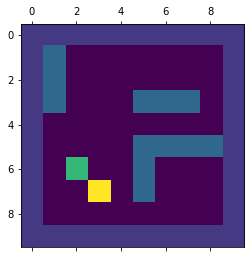

<Figure size 720x720 with 0 Axes>

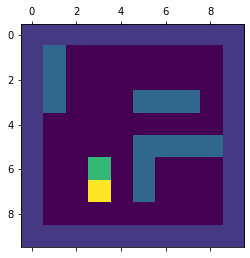

<Figure size 720x720 with 0 Axes>

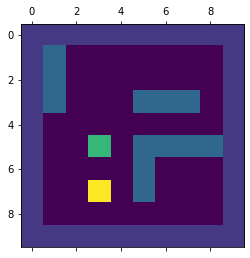

<Figure size 720x720 with 0 Axes>

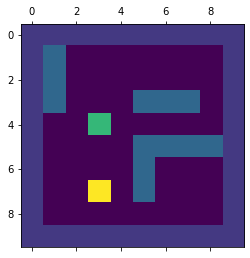

<Figure size 720x720 with 0 Axes>

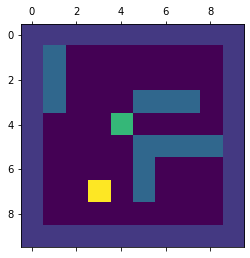

<Figure size 720x720 with 0 Axes>

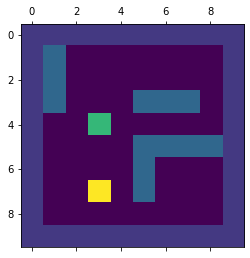

<Figure size 720x720 with 0 Axes>

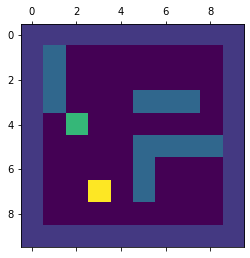

<Figure size 720x720 with 0 Axes>

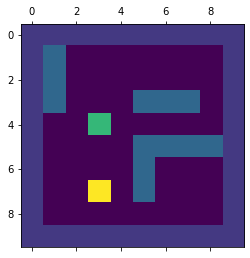

<Figure size 720x720 with 0 Axes>

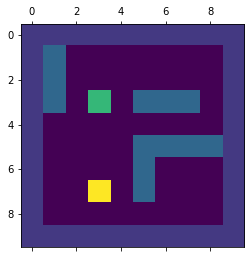

<Figure size 720x720 with 0 Axes>

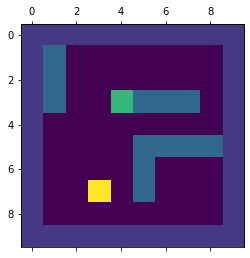

<Figure size 720x720 with 0 Axes>

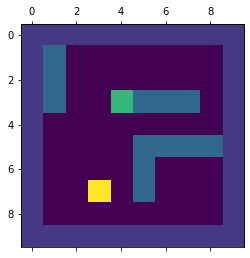

<Figure size 720x720 with 0 Axes>

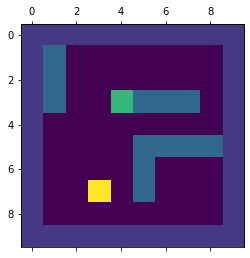

<Figure size 720x720 with 0 Axes>

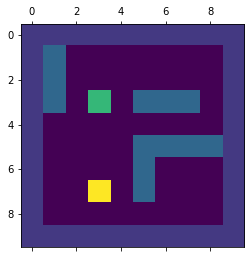

<Figure size 720x720 with 0 Axes>

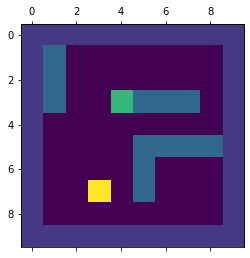

<Figure size 720x720 with 0 Axes>

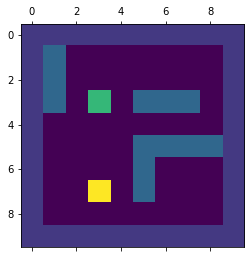

<Figure size 720x720 with 0 Axes>

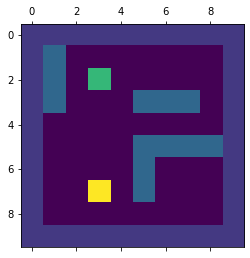

<Figure size 720x720 with 0 Axes>

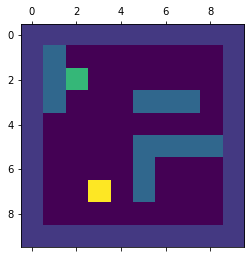

<Figure size 720x720 with 0 Axes>

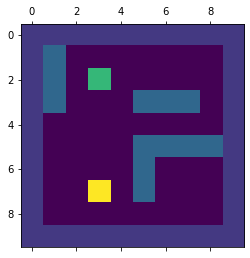

<Figure size 720x720 with 0 Axes>

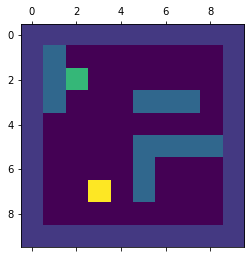

<Figure size 720x720 with 0 Axes>

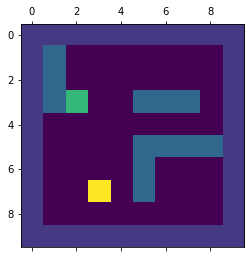

<Figure size 720x720 with 0 Axes>

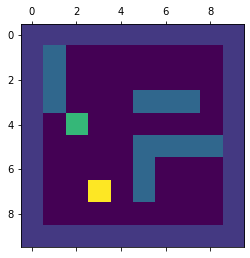

<Figure size 720x720 with 0 Axes>

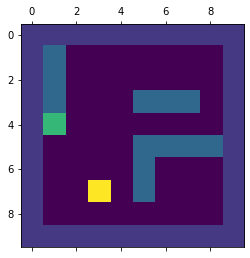

<Figure size 720x720 with 0 Axes>

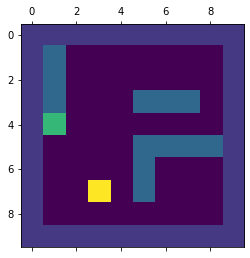

<Figure size 720x720 with 0 Axes>

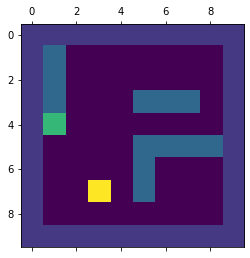

<Figure size 720x720 with 0 Axes>

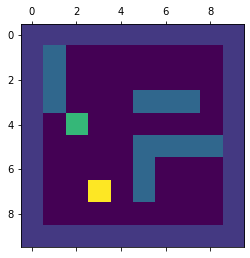

<Figure size 720x720 with 0 Axes>

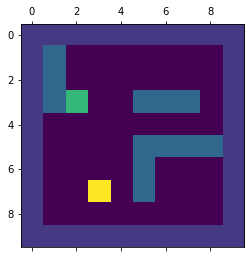

<Figure size 720x720 with 0 Axes>

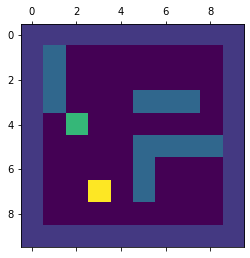

<Figure size 720x720 with 0 Axes>

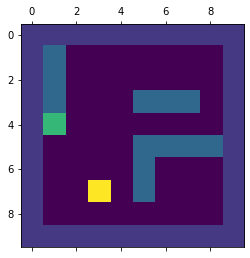

<Figure size 720x720 with 0 Axes>

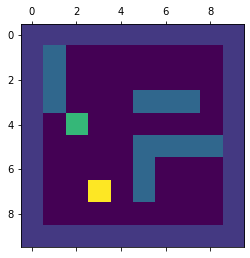

<Figure size 720x720 with 0 Axes>

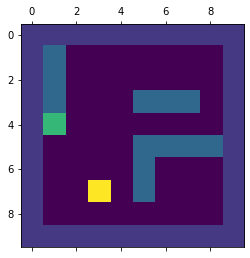

<Figure size 720x720 with 0 Axes>

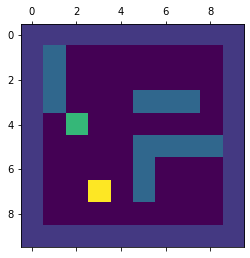

<Figure size 720x720 with 0 Axes>

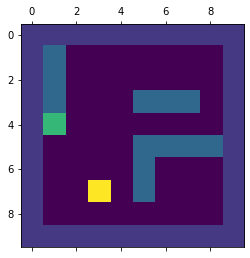

<Figure size 720x720 with 0 Axes>

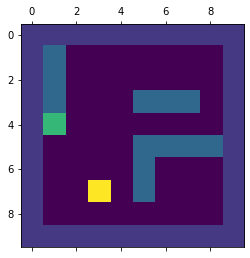

<Figure size 720x720 with 0 Axes>

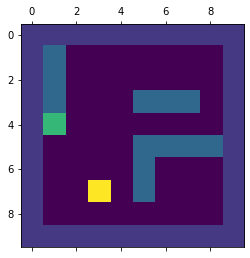

<Figure size 720x720 with 0 Axes>

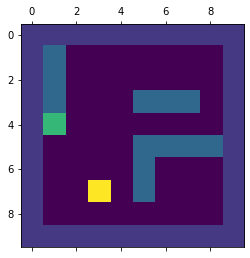

<Figure size 720x720 with 0 Axes>

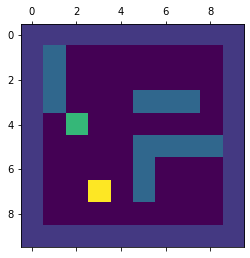

<Figure size 720x720 with 0 Axes>

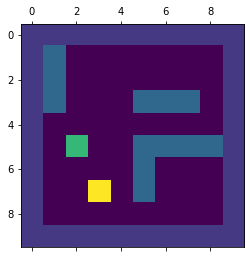

<Figure size 720x720 with 0 Axes>

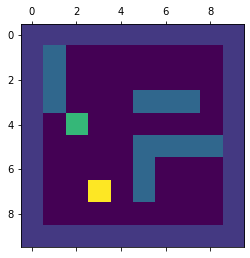

<Figure size 720x720 with 0 Axes>

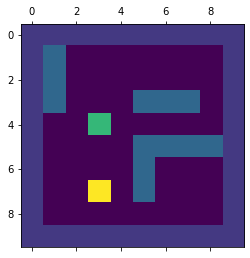

<Figure size 720x720 with 0 Axes>

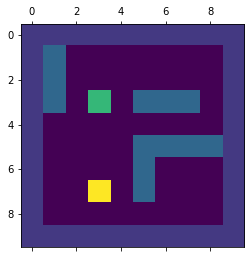

<Figure size 720x720 with 0 Axes>

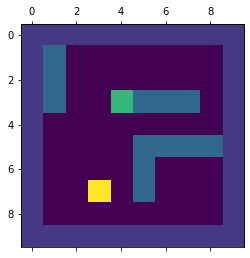

<Figure size 720x720 with 0 Axes>

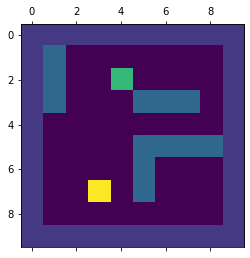

<Figure size 720x720 with 0 Axes>

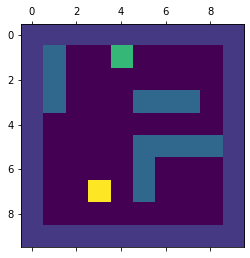

<Figure size 720x720 with 0 Axes>

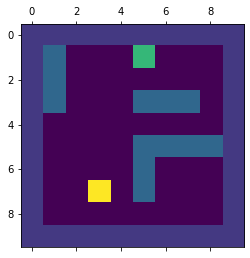

<Figure size 720x720 with 0 Axes>

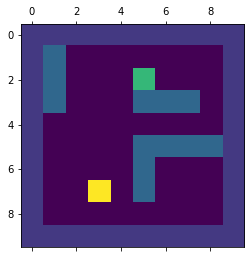

<Figure size 720x720 with 0 Axes>

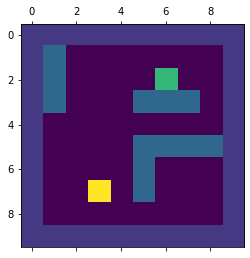

<Figure size 720x720 with 0 Axes>

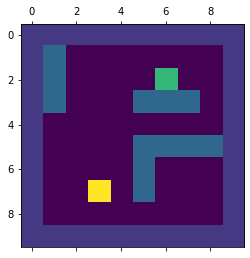

<Figure size 720x720 with 0 Axes>

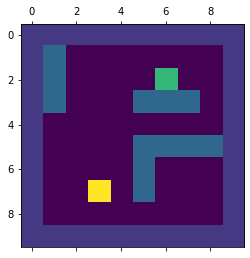

<Figure size 720x720 with 0 Axes>

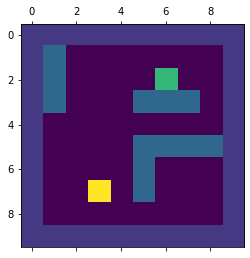

<Figure size 720x720 with 0 Axes>

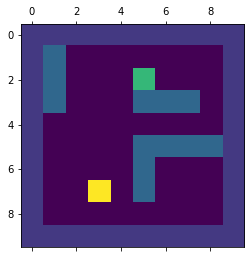

<Figure size 720x720 with 0 Axes>

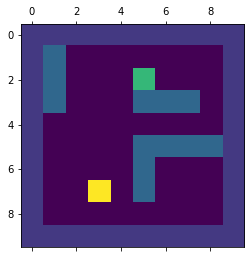

<Figure size 720x720 with 0 Axes>

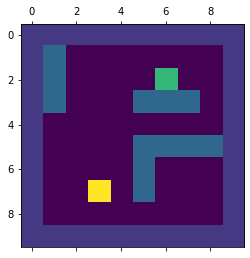

<Figure size 720x720 with 0 Axes>

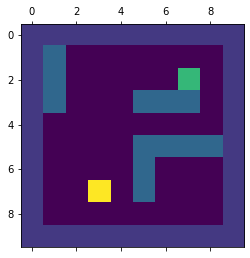

<Figure size 720x720 with 0 Axes>

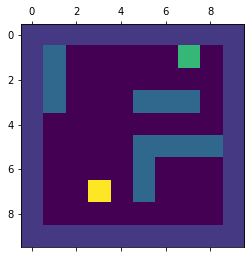

<Figure size 720x720 with 0 Axes>

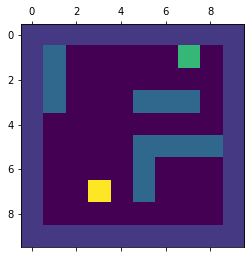

<Figure size 720x720 with 0 Axes>

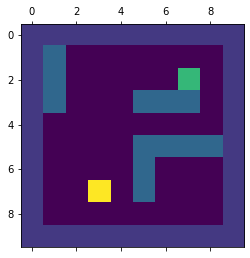

<Figure size 720x720 with 0 Axes>

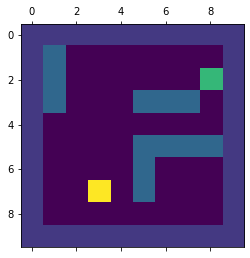

<Figure size 720x720 with 0 Axes>

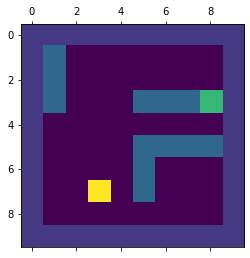

<Figure size 720x720 with 0 Axes>

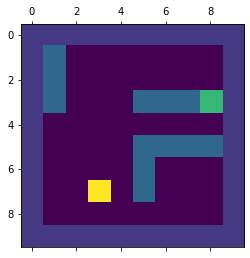

<Figure size 720x720 with 0 Axes>

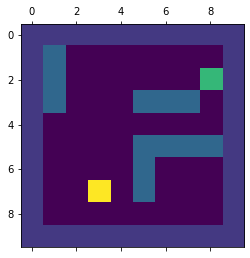

<Figure size 720x720 with 0 Axes>

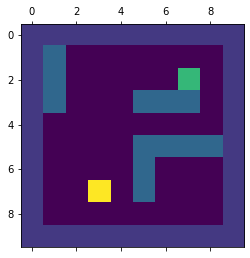

<Figure size 720x720 with 0 Axes>

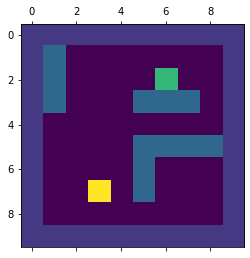

<Figure size 720x720 with 0 Axes>

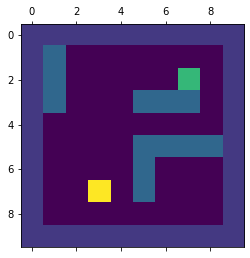

<Figure size 720x720 with 0 Axes>

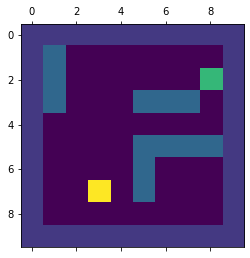

<Figure size 720x720 with 0 Axes>

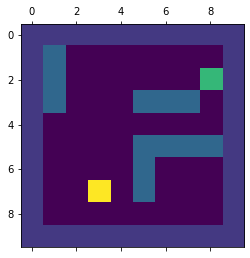

<Figure size 720x720 with 0 Axes>

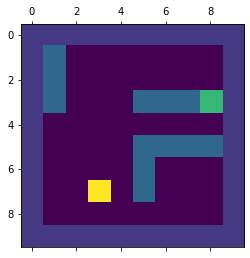

<Figure size 720x720 with 0 Axes>

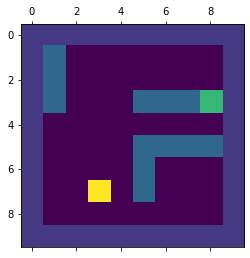

<Figure size 720x720 with 0 Axes>

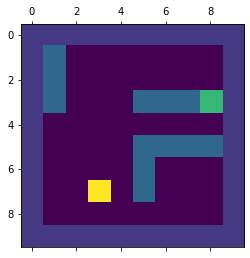

<Figure size 720x720 with 0 Axes>

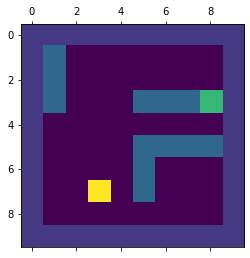

<Figure size 720x720 with 0 Axes>

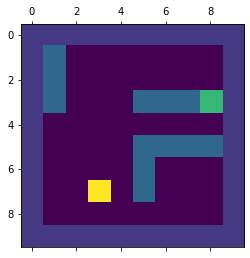

<Figure size 720x720 with 0 Axes>

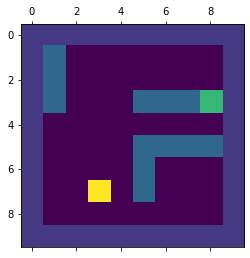

<Figure size 720x720 with 0 Axes>

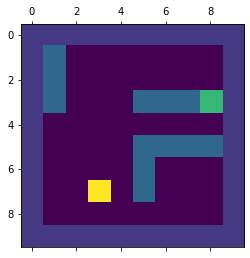

<Figure size 720x720 with 0 Axes>

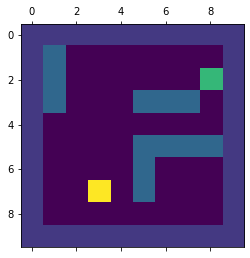

<Figure size 720x720 with 0 Axes>

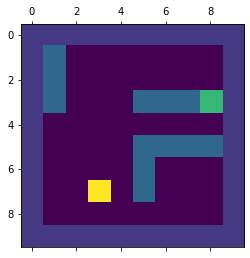

<Figure size 720x720 with 0 Axes>

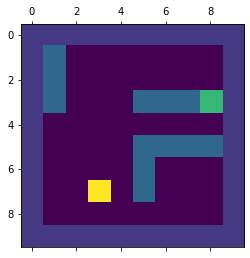

<Figure size 720x720 with 0 Axes>

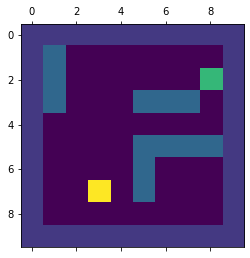

<Figure size 720x720 with 0 Axes>

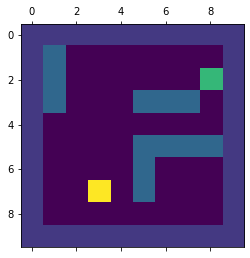

<Figure size 720x720 with 0 Axes>

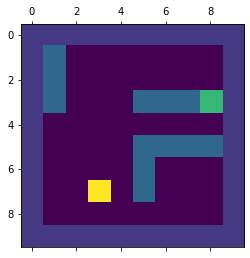

<Figure size 720x720 with 0 Axes>

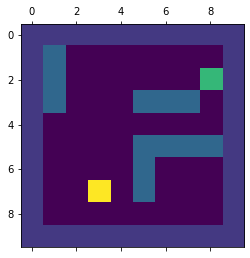

<Figure size 720x720 with 0 Axes>

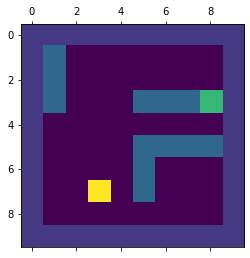

<Figure size 720x720 with 0 Axes>

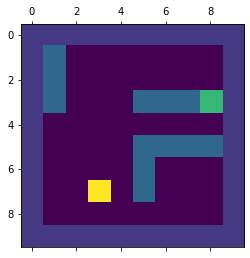

<Figure size 720x720 with 0 Axes>

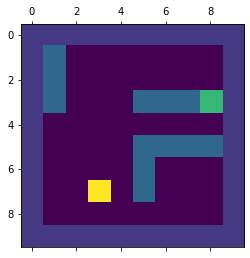

<Figure size 720x720 with 0 Axes>

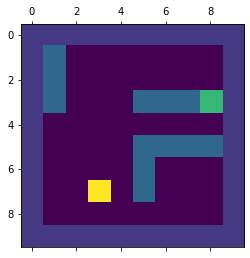

<Figure size 720x720 with 0 Axes>

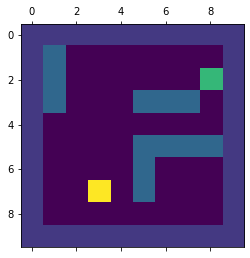

<Figure size 720x720 with 0 Axes>

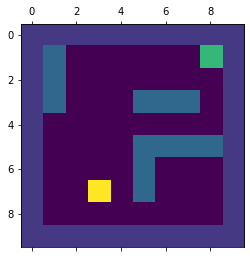

<Figure size 720x720 with 0 Axes>

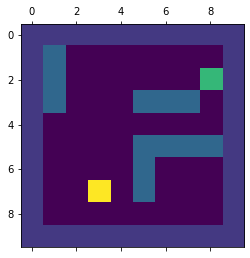

<Figure size 720x720 with 0 Axes>

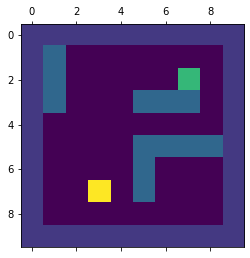

<Figure size 720x720 with 0 Axes>

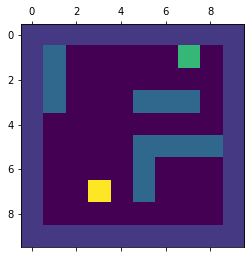

<Figure size 720x720 with 0 Axes>

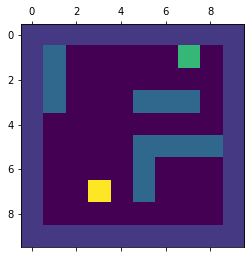

<Figure size 720x720 with 0 Axes>

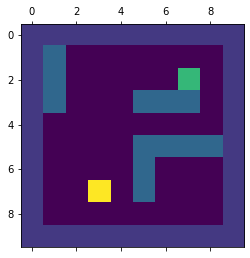

<Figure size 720x720 with 0 Axes>

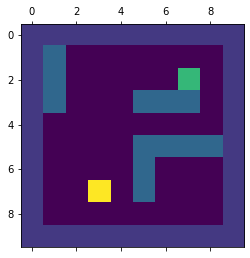

<Figure size 720x720 with 0 Axes>

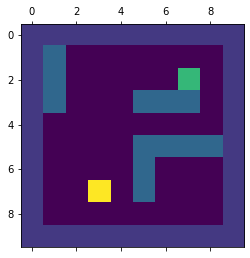

<Figure size 720x720 with 0 Axes>

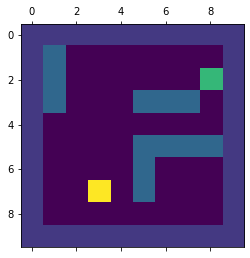

<Figure size 720x720 with 0 Axes>

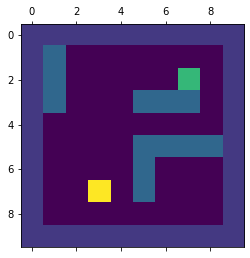

<Figure size 720x720 with 0 Axes>

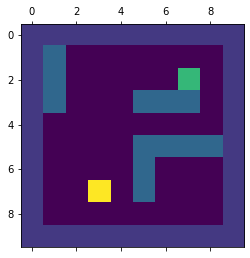

<Figure size 720x720 with 0 Axes>

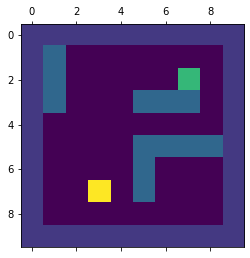

<Figure size 720x720 with 0 Axes>

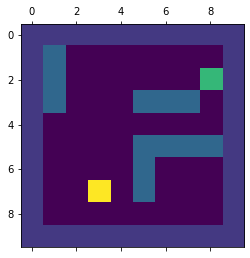

<Figure size 720x720 with 0 Axes>

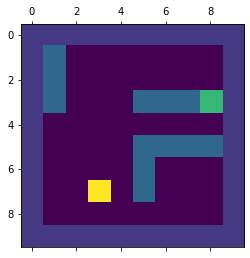

<Figure size 720x720 with 0 Axes>

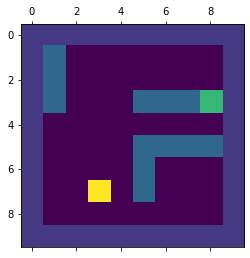

<Figure size 720x720 with 0 Axes>

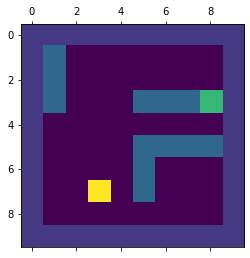

<Figure size 720x720 with 0 Axes>

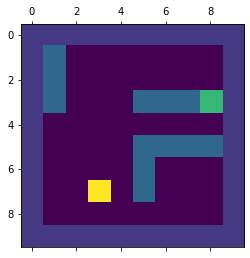

<Figure size 720x720 with 0 Axes>

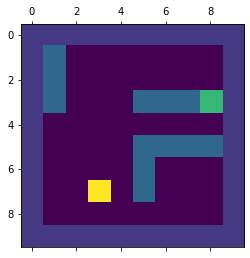

<Figure size 720x720 with 0 Axes>

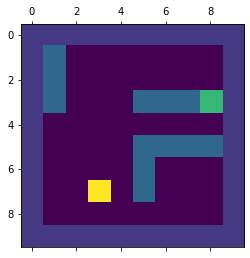

<Figure size 720x720 with 0 Axes>

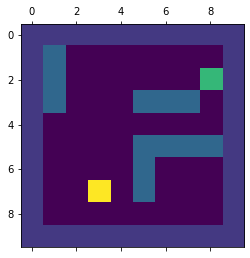

<Figure size 720x720 with 0 Axes>

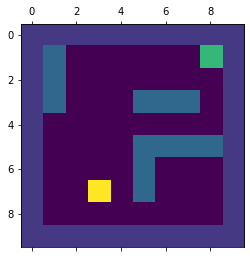

<Figure size 720x720 with 0 Axes>

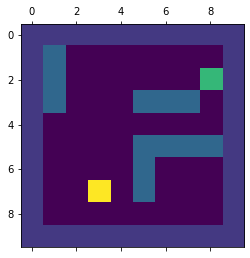

<Figure size 720x720 with 0 Axes>

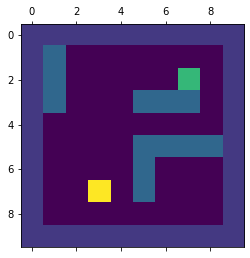

<Figure size 720x720 with 0 Axes>

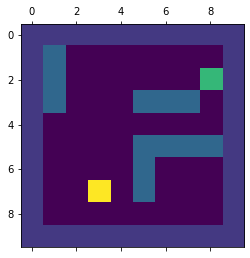

<Figure size 720x720 with 0 Axes>

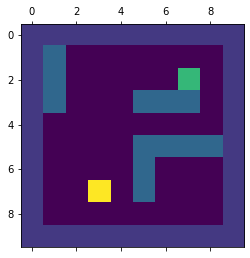

<Figure size 720x720 with 0 Axes>

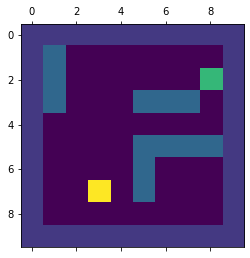

<Figure size 720x720 with 0 Axes>

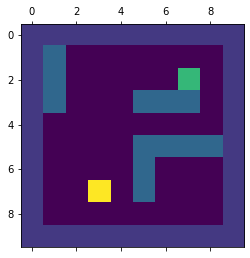

<Figure size 720x720 with 0 Axes>

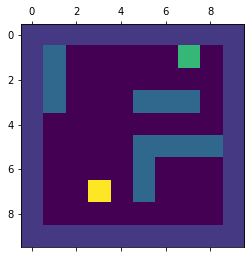

<Figure size 720x720 with 0 Axes>

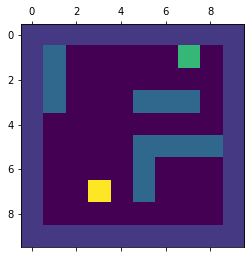

<Figure size 720x720 with 0 Axes>

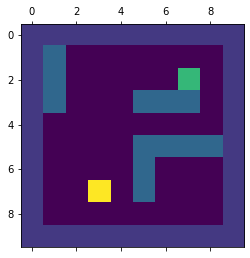

<Figure size 720x720 with 0 Axes>

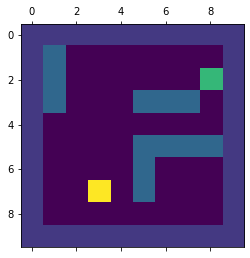

<Figure size 720x720 with 0 Axes>

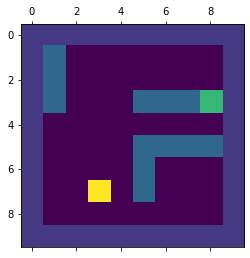

<Figure size 720x720 with 0 Axes>

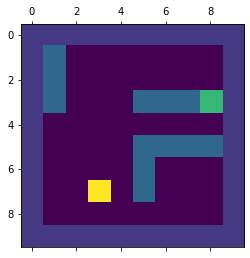

<Figure size 720x720 with 0 Axes>

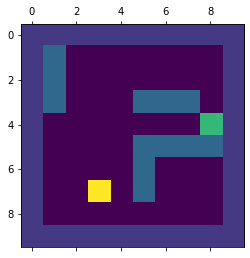

<Figure size 720x720 with 0 Axes>

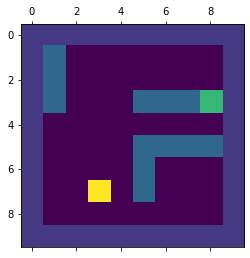

<Figure size 720x720 with 0 Axes>

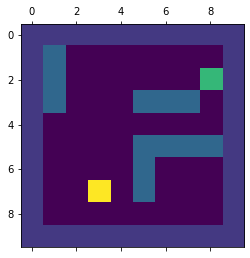

<Figure size 720x720 with 0 Axes>

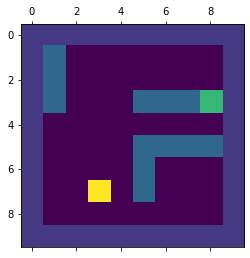

<Figure size 720x720 with 0 Axes>

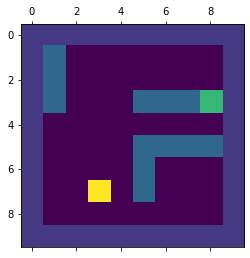

<Figure size 720x720 with 0 Axes>

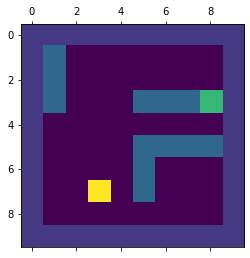

<Figure size 720x720 with 0 Axes>

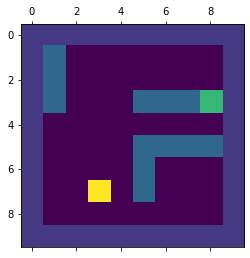

<Figure size 720x720 with 0 Axes>

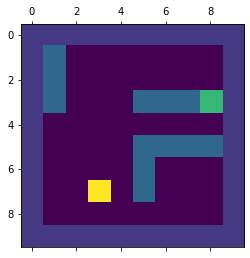

<Figure size 720x720 with 0 Axes>

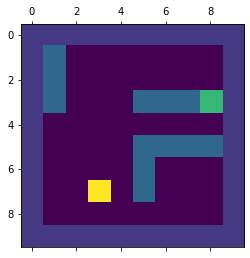

<Figure size 720x720 with 0 Axes>

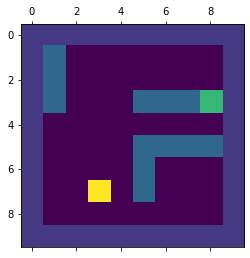

<Figure size 720x720 with 0 Axes>

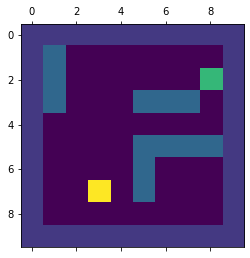

<Figure size 720x720 with 0 Axes>

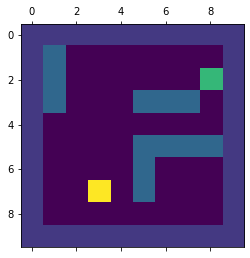

<Figure size 720x720 with 0 Axes>

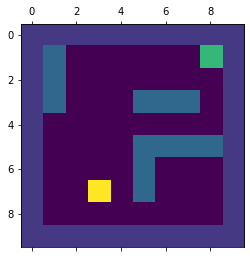

<Figure size 720x720 with 0 Axes>

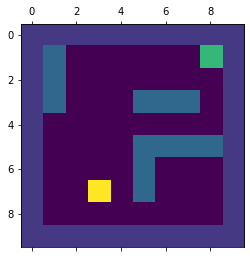

<Figure size 720x720 with 0 Axes>

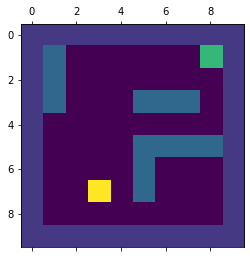

<Figure size 720x720 with 0 Axes>

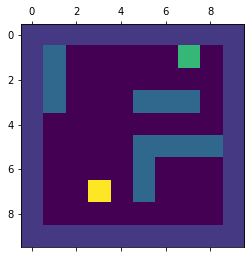

<Figure size 720x720 with 0 Axes>

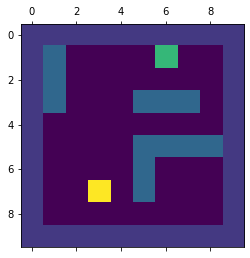

<Figure size 720x720 with 0 Axes>

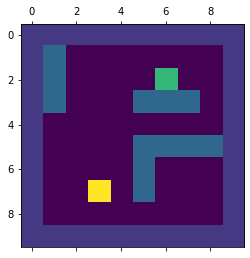

<Figure size 720x720 with 0 Axes>

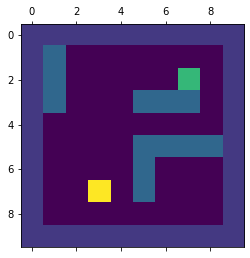

<Figure size 720x720 with 0 Axes>

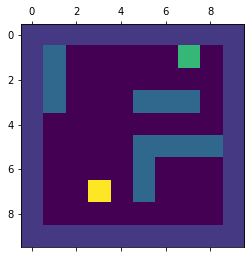

<Figure size 720x720 with 0 Axes>

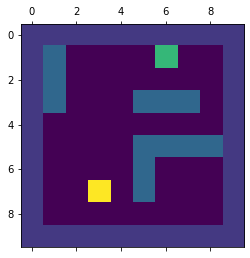

<Figure size 720x720 with 0 Axes>

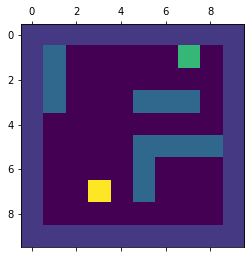

<Figure size 720x720 with 0 Axes>

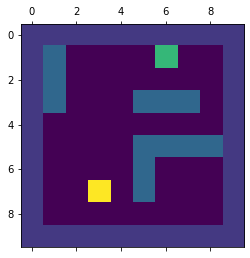

<Figure size 720x720 with 0 Axes>

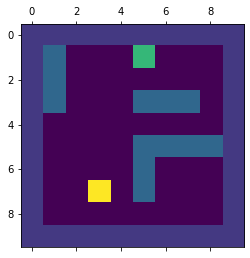

<Figure size 720x720 with 0 Axes>

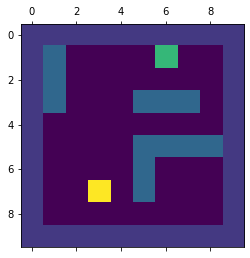

<Figure size 720x720 with 0 Axes>

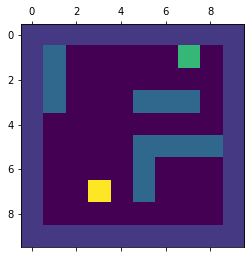

<Figure size 720x720 with 0 Axes>

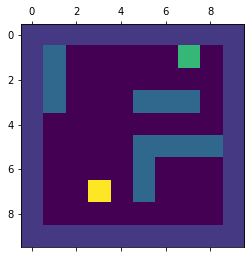

<Figure size 720x720 with 0 Axes>

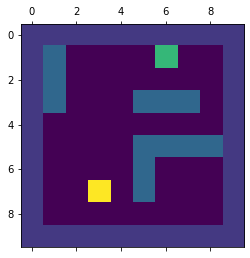

<Figure size 720x720 with 0 Axes>

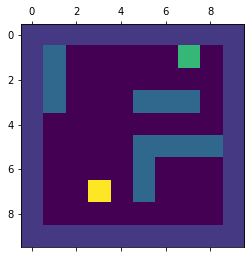

<Figure size 720x720 with 0 Axes>

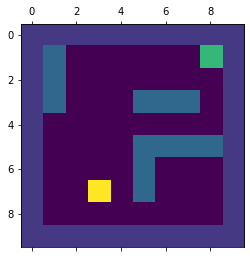

<Figure size 720x720 with 0 Axes>

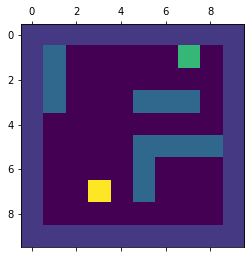

<Figure size 720x720 with 0 Axes>

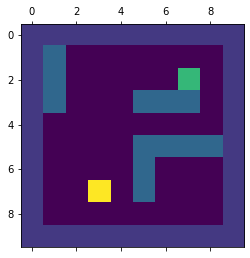

<Figure size 720x720 with 0 Axes>

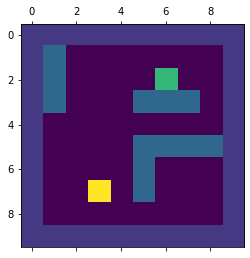

<Figure size 720x720 with 0 Axes>

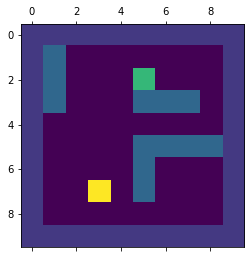

<Figure size 720x720 with 0 Axes>

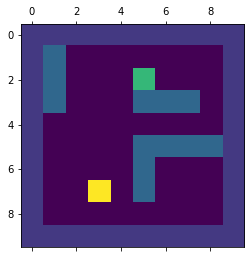

<Figure size 720x720 with 0 Axes>

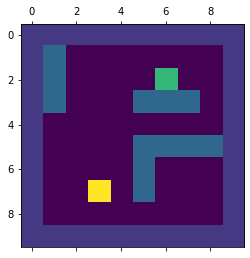

<Figure size 720x720 with 0 Axes>

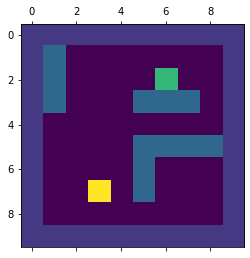

<Figure size 720x720 with 0 Axes>

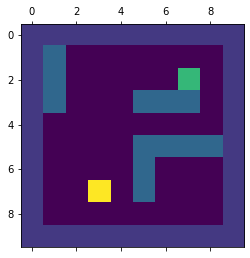

<Figure size 720x720 with 0 Axes>

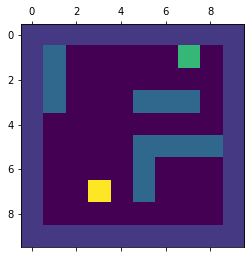

<Figure size 720x720 with 0 Axes>

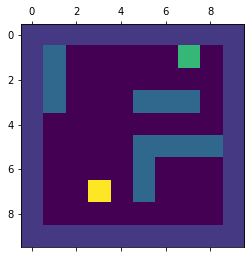

<Figure size 720x720 with 0 Axes>

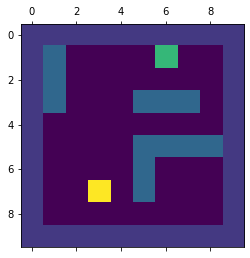

<Figure size 720x720 with 0 Axes>

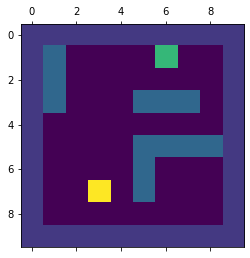

<Figure size 720x720 with 0 Axes>

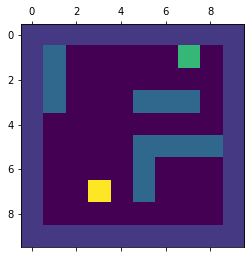

<Figure size 720x720 with 0 Axes>

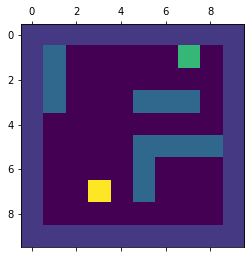

<Figure size 720x720 with 0 Axes>

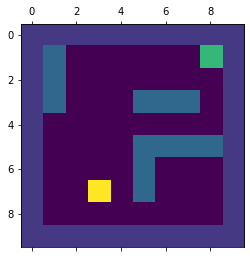

<Figure size 720x720 with 0 Axes>

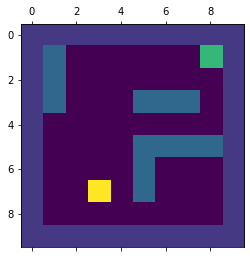

<Figure size 720x720 with 0 Axes>

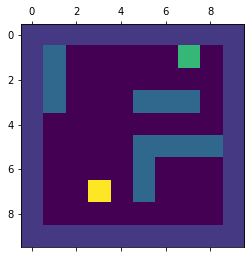

<Figure size 720x720 with 0 Axes>

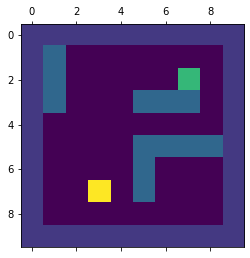

<Figure size 720x720 with 0 Axes>

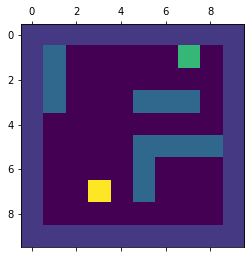

<Figure size 720x720 with 0 Axes>

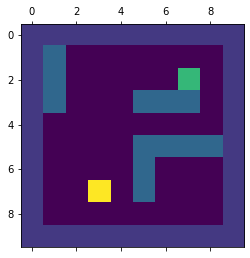

<Figure size 720x720 with 0 Axes>

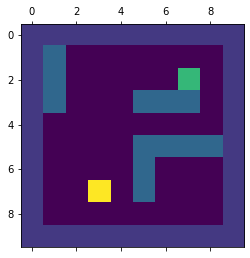

<Figure size 720x720 with 0 Axes>

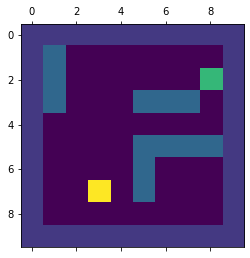

<Figure size 720x720 with 0 Axes>

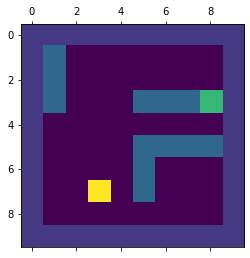

<Figure size 720x720 with 0 Axes>

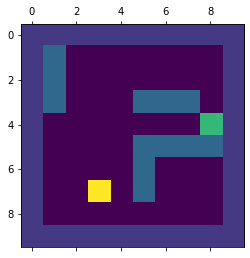

<Figure size 720x720 with 0 Axes>

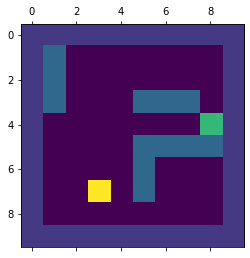

<Figure size 720x720 with 0 Axes>

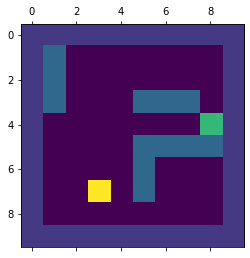

<Figure size 720x720 with 0 Axes>

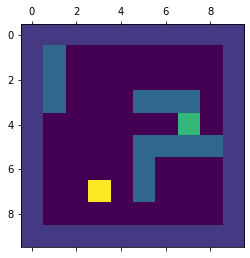

<Figure size 720x720 with 0 Axes>

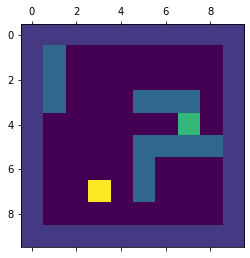

<Figure size 720x720 with 0 Axes>

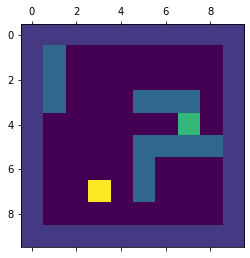

<Figure size 720x720 with 0 Axes>

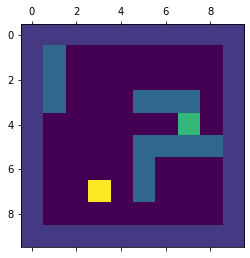

<Figure size 720x720 with 0 Axes>

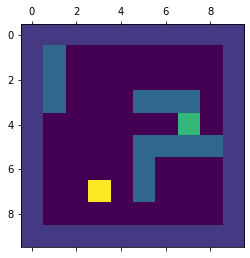

<Figure size 720x720 with 0 Axes>

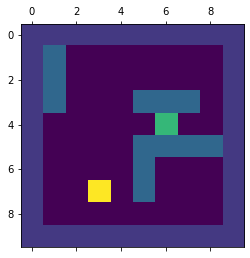

<Figure size 720x720 with 0 Axes>

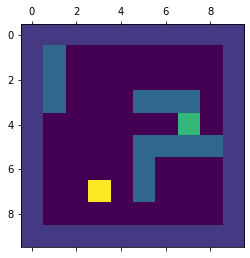

<Figure size 720x720 with 0 Axes>

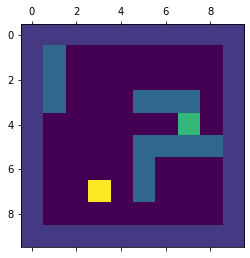

<Figure size 720x720 with 0 Axes>

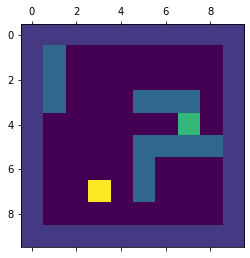

<Figure size 720x720 with 0 Axes>

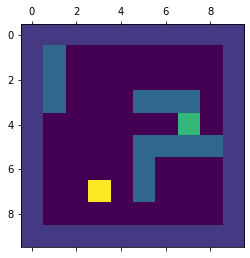

<Figure size 720x720 with 0 Axes>

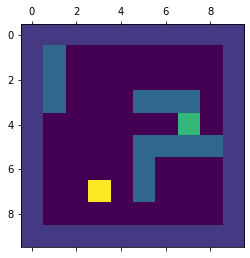

<Figure size 720x720 with 0 Axes>

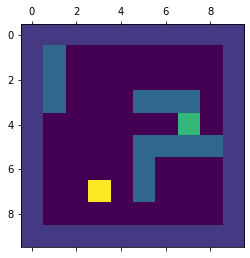

<Figure size 720x720 with 0 Axes>

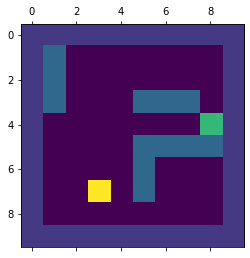

<Figure size 720x720 with 0 Axes>

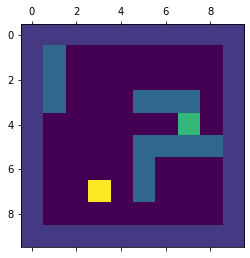

<Figure size 720x720 with 0 Axes>

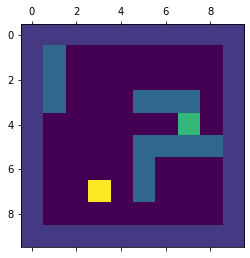

<Figure size 720x720 with 0 Axes>

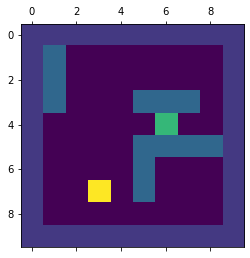

<Figure size 720x720 with 0 Axes>

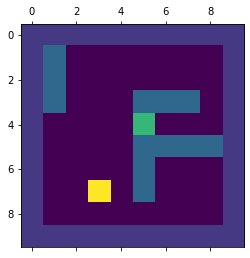

<Figure size 720x720 with 0 Axes>

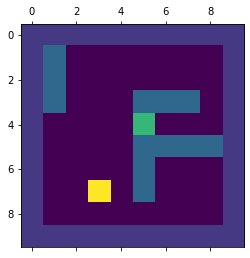

<Figure size 720x720 with 0 Axes>

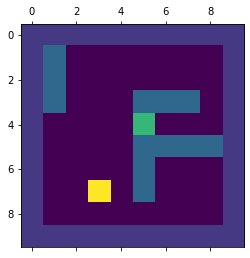

<Figure size 720x720 with 0 Axes>

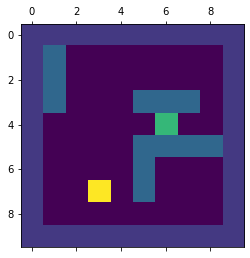

<Figure size 720x720 with 0 Axes>

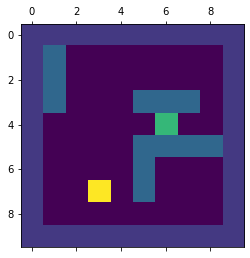

<Figure size 720x720 with 0 Axes>

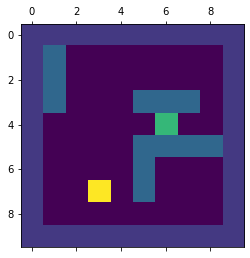

<Figure size 720x720 with 0 Axes>

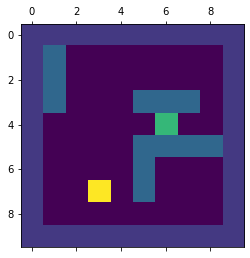

<Figure size 720x720 with 0 Axes>

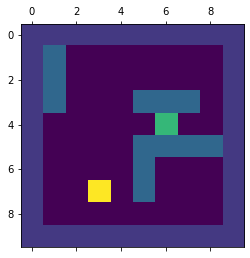

<Figure size 720x720 with 0 Axes>

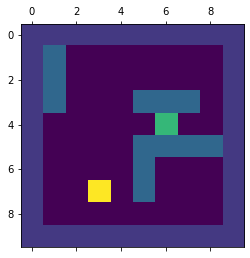

<Figure size 720x720 with 0 Axes>

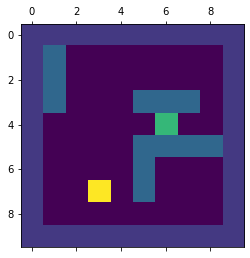

<Figure size 720x720 with 0 Axes>

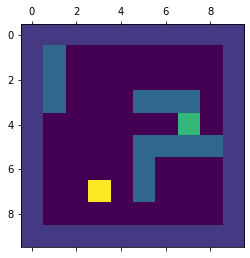

In [4]:
model = PPO1.load("../models/fake/{}".format(model_name))

env = MyEnv(N=10)
obs = env.reset()
for _ in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done is True:
        break